Nama: Giovanka Steviano Harry Premono

NIM : 71220924

#Simple Linear Reggresion

In [ ]:
!pip install yfinance
!pip install pandas
!pip install pandas_ta
!pip install matplotlib
!pip install plotly
!pip install scikit-learn
!pip install mplfinance
!pip install backtesting
# Downgrade numpy, soalnya error di pandas_ta tadi
!pip install numpy==1.24.3

In [ ]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
  Saham = 'BBTN.JK'
  data = yf.download(Saham, start ='2020-01-01', end='2024-12-31', interval ='1d', auto_adjust=False, multi_level_index=False)
  # data.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
  data

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,1733.748169,1892.298706,1910.066772,1874.530640,1910.066772,6116029
2020-01-03,1750.027588,1910.066772,1910.066772,1874.530640,1910.066772,9313789
2020-01-06,1733.748169,1892.298706,1910.066772,1874.530640,1892.298706,12162158
2020-01-07,1725.608521,1883.414673,1901.182739,1865.646606,1874.530640,20977638
2020-01-08,1684.910278,1838.994507,1883.414673,1838.994507,1865.646606,14326153
...,...,...,...,...,...,...
2024-12-20,1125.000000,1125.000000,1125.000000,1105.000000,1110.000000,10651000
2024-12-23,1140.000000,1140.000000,1150.000000,1130.000000,1140.000000,12581700
2024-12-24,1130.000000,1130.000000,1150.000000,1130.000000,1135.000000,7787300


In [ ]:
#Generate data untuk regresi (Simple Linear regression)
regresi = data.copy()
regresi =  regresi [['Close']]
regresi['target'] = data['Close'].shift(-2)
regresi.dropna(inplace=True)
x = regresi['Close']
y = regresi['target']
regresi

,Close,target
Date,,
2020-01-02,1892.298706,1892.298706
2020-01-03,1910.066772,1883.414673
2020-01-06,1892.298706,1838.994507
2020-01-07,1883.414673,1874.530640
2020-01-08,1838.994507,1918.950806
...,...,...
2024-12-18,1155.000000,1125.000000
2024-12-19,1110.000000,1140.000000
2024-12-20,1125.000000,1130.000000


Mean Squared Error: 2450.3057500553314
R-squared: 0.9427797039095851
koefisien =  [0.9667225]
Intersep = 44.16230089397072


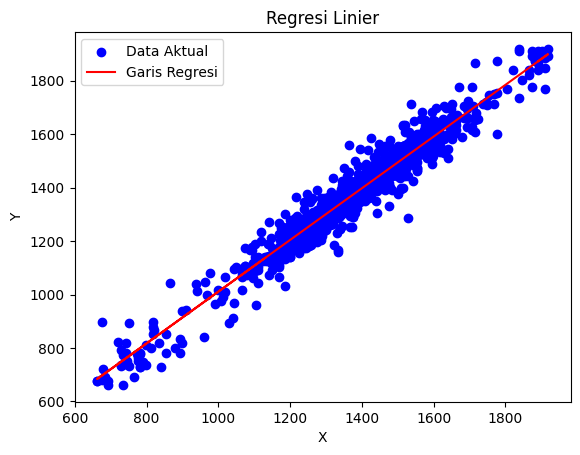

In [ ]:
# Model Simpel Linear Regresi

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)

model = LinearRegression()

model.fit(x_train, y_train)

y_prediksi = model.predict(x_test)

mse = mean_squared_error(y_test, y_prediksi)
r2 = r2_score(y_test, y_prediksi)
# print(x_train)
# print(y_prediksi)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

koefisien = model.coef_
intersep = model.intercept_

print("koefisien = ", koefisien)
print("Intersep =", intersep)

#Plot Datanya
plt.scatter (x, y, color = 'blue', label = 'Data Aktual')
plt.plot(x.values.reshape(-1,1), model.predict(x.values.reshape(-1,1)), color = 'red', label = 'Garis Regresi')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresi Linier')
plt.legend()
plt.show()

#Multiple Linear Regression

In [ ]:
saham = 'UNTR.JK'
data = yf.download(saham, start = '2020-01-01', end='2024-12-31', interval ='1d', auto_adjust=False, multi_level_index=False)

#Generate data untuk regresi
regresi = data.copy()
regresi = regresi[['Close']]
regresi['hma10'] = ta.hma(regresi['Close'], length=10)
regresi['hma20'] = ta.hma(regresi['Close'], length=20)
regresi['rsi'] = ta.rsi(regresi['Close'], length=14)
regresi['target'] = regresi['Close'].shift(-2)
regresi.dropna(inplace=True)
x = regresi[['Close', 'hma10', 'hma20', 'rsi']]
y = regresi['target'].values
regresi, y,

[*********************100%***********************]  1 of 1 completed


(              Close         hma10         hma20        rsi   target
 Date                                                               
 2020-02-03  19075.0  19363.055556  19288.747835  23.480119  18750.0
 2020-02-04  18775.0  19055.025253  19044.395022  21.476462  18700.0
 2020-02-05  18750.0  18772.272727  18820.339827  21.313241  18800.0
 2020-02-06  18700.0  18563.787879  18636.206710  20.969979  18275.0
 2020-02-07  18800.0  18502.373737  18506.569264  23.619536  18025.0
 ...             ...           ...           ...        ...      ...
 2024-12-18  26275.0  26983.989899  27766.178571  40.387066  25675.0
 2024-12-19  26300.0  26412.878788  27378.162338  40.675130  25450.0
 2024-12-20  25675.0  25893.358586  26917.771645  35.992541  25200.0
 2024-12-23  25450.0  25457.500000  26443.585498  34.454764  25400.0
 2024-12-24  25200.0  25145.858586  25970.755411  32.778977  26775.0
 
 [1187 rows x 5 columns],
 array([18750., 18700., 18800., ..., 25200., 25400., 26775.]))

In [ ]:
#Membangun Model

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(x_train, y_train)

y_prediksi = model.predict(x_test)

mse = mean_squared_error(y_test, y_prediksi)
r2 = r2_score(y_test, y_prediksi)

koefisien = model.coef_
intersep = model.intercept_

print("koefisien = ", koefisien)
print("Intersep =", intersep)

koefisien =  [0.91118785 0.04262642 0.0269216  3.99399053]
Intersep = 303.10626102740935


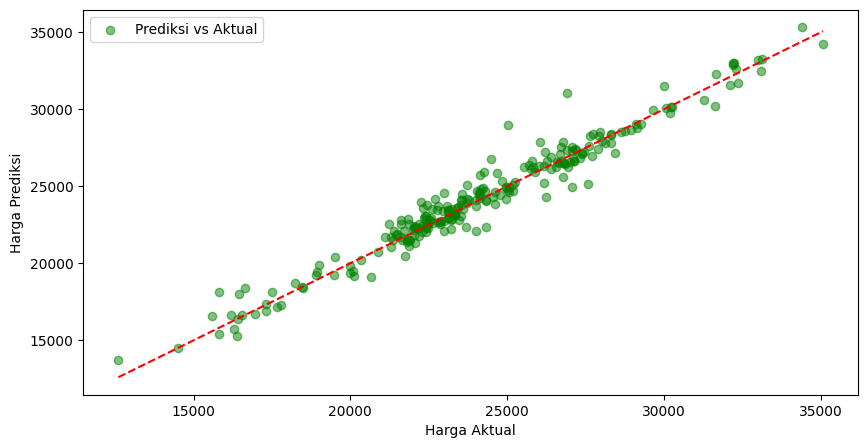

In [ ]:
#Plot data
plt.figure(figsize = (10,5))
plt.scatter(y_test, y_prediksi, color = 'green',alpha = 0.5,  label = 'Prediksi vs Aktual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', linestyle = "--")
plt.xlabel("Harga Aktual")
plt.ylabel("Harga Prediksi")
plt.legend()
plt.show()